s = 2

In [10]:
ss = 3

In [5]:
import os

In [12]:
print(os.sep)

\


In [13]:
print(os.name)

nt


In [14]:
os.cpu_count()

16

In [8]:
import os
base = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\data\dogs"
# os.listdir(base)
i = 0
for x in os.listdir(base):
    p = base + "\\" + x
    suffix = os.path.splitext(x)[1]
    name = "dog_" + str(i) + suffix
    pp = base + "\\" + name
    os.rename(p,pp)
    i = i + 1

In [4]:
# 图片的重命名
ls = ["dogs", "cats"]
base = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\data"
for d in ls:
    try:
        i = 0
        for x in os.listdir(d):
            p = base + "\\" + d + "\\" + x
            suffix = os.path.splitext(x)[1]
            dst =d + "_" + str(i) + suffix
            pp = base + "\\" + d + "\\" + dst
            os.rename(p, pp)
            i += 1
    except:
        continue

In [7]:
os.listdir("./data")

['cats', 'dogs']

In [9]:
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# LeNet

1.图像预处理，将图片以中心为准裁剪为256*256的大小

In [1]:
import cv2
from torch.utils.data import Dataset
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
class MyData():
    # 初始化 root_dir大的路径和label_dir具体内容/获取地址
    def __init__(self, root_dir):
        # 创建全局变量
        self.root_dir = root_dir
        self.label_dir = os.listdir(self.root_dir)
        # 获取一个路径地址 .join()作用为拼接地址
        self.path = [os.path.join(self.root_dir + "/" + x) for x in self.label_dir]
    def caches(self):
        if not os.path.exists(self.root_dir + "/caches"):
            os.mkdir(self.root_dir + "/caches")
        else:
            print("目录已存在")
    def __getitem__(self):
        self.caches(self)
        for x in os.listdir(self.path):
            for i in range(x):
                # 读取其中的一个图片
                img = Image.open(self.path + "/" + i)
                new_img = img.resize((256, 256))
                new_img.save(self.root_dir + "/caches/" + i)

In [3]:
import os
# 数据集路径
root_dir = "./data"
# 数据集
dataset = MyData(root_dir)

In [20]:
import cv2
from torch.utils.data import Dataset
from PIL import Image
import os
import matplotlib.pyplot as plt
import os

In [2]:
paths = ["./data/dogs/", "./data/cats/"]
if not os.path.exists("./data/caches"):
    os.mkdir("./data/caches")
dogs = os.listdir(paths[0])
cats = os.listdir(paths[1])
for path in paths:
    p = os.listdir(path)
    for pp in p:
        img_path = path + pp
        img = Image.open(img_path)
        new_img = img.resize((224, 224))
        new_img.save("./data/caches/" + pp)

In [21]:
p1 = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\cat.jpg"
p2 = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\dog.jpg"
img = Image.open(p1)
new_img = img.resize((224, 224))
new_img.save(p1)
img = Image.open(p2)
new_img = img.resize((224, 224))
new_img.save(p2)

预测的图片的处理

In [22]:
from torch.utils import data
cat = data.DataLoader(p1)
dog = data.DataLoader(p2)

In [72]:
import torchvision.transforms as transforms
import cv2 as cv

img = cv.imread(p1)
print(img.shape)   # numpy数组格式为（H,W,C）

transf = transforms.ToTensor()
cat = transf(img)  # tensor数据格式是torch(C,H,W)
print(cat.size())
img = cv.imread(p2)
transf = transforms.ToTensor()
dog = transf(img)

(224, 224, 3)
torch.Size([3, 224, 224])


In [81]:
cat = cat.cuda()
dog = dog.cuda()
print(cat)

tensor([[[0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         ...,
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941],
         [0.8941, 0.8941, 0.8941,  ..., 0.8941, 0.8941, 0.8941]],

        [[0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647],
         [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647],
         [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647],
         ...,
         [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647],
         [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647],
         [0.9647, 0.9647, 0.9647,  ..., 0.9647, 0.9647, 0.9647]],

        [[0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9922],
         [0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9922],
         [0.9922, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.

2.训练模型(AlexNet)

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

2.1 打标签

In [2]:
tr="train"
te="test"
file_path = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\data\caches"

In [3]:
import os
import numpy as np
from torchvision import transforms,datasets

#定义transforms
transforms = transforms.Compose(
[

transforms.RandomResizedCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
]

)

train_data = datasets.ImageFolder(os.path.join(file_path,tr), transforms)
test_data=datasets.ImageFolder(os.path.join(file_path,te), transforms)

In [54]:
tx = r"C:\Users\sanyuan\Desktop\cat_dog_classification_CNN\text"
#定义transforms
transforms = transforms.Compose(
[

transforms.RandomResizedCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
]
)
text = datasets.ImageFolder(tx, transforms)

In [56]:
text = data.DataLoader(text, batch_size=1, shuffle=True)

In [6]:
train_data
#第一张[0]训练图片的具体形况，前面是图片[0]，后面是标签[1]。标签0代表猫，1代表狗。
#这是由于在file_path/train的文件夹下Cat在Dog的前面，
#所以前者是0，后者是1。
train_data[0][1]

train_data[0][0].shape

torch.Size([3, 224, 224])

In [7]:
import sys
from torch.utils import data
num_workers = 0 if sys.platform.startswith("win32") else 4
batch_size=32 # 批训练大小
train_iter = data.DataLoader(train_data,batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=num_workers)
test_iter = data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [49]:
net = nn.Sequential(
    nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 2048), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(2048, 2))

In [84]:
net

Sequential(
  (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=6400, out_features=4096, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=4096, out_features=2048, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_featu

In [34]:
X = torch.randn(1, 3, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 2048])
ReLU output shape:	 torch.Size([1, 2048])
Dropout output shape:	 torch.Size([1, 2048])
Linear output shape:	 torch.Size([1,

loss 0.637, train acc 0.637, test acc 0.636
663.0 examples/sec on cuda:0


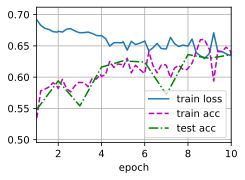

In [39]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [63]:
class AlexNet(nn.Module):
    def __init__(self, train_iter=None, test_iter=None, predicted=None):
        super().__init__()
        self.predicted = predicted
        self.train_iter = train_iter
        self.test_iter = test_iter
        self.net = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Flatten(),
        nn.Linear(6400, 4096), nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 2048), nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(2048, 2))
    def train_ch6(self):
        if self.predicted==None:
            d2l.train_ch6(self.net, self.train_iter, self.train_iter, 10, 0.01, d2l.try_gpu())
        else:
            self.net.to(d2l.try_gpu())
            self.predicted = self.net(self.predicted)

In [46]:
print(A)

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=6400, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_features=4096, out_features=2048, bias=True)
    (18): ReLU()
    (

loss 0.641, train acc 0.626, test acc 0.522
414.0 examples/sec on cuda:0


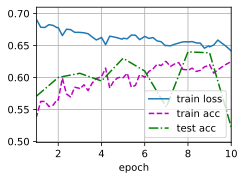

In [35]:
A = AlexNet(train_iter=train_iter, test_iter=test_iter)
A.train_ch6()
torch.save(A.state_dict(), 'mlp.params')

In [78]:
clone = AlexNet(predicted=cat)

In [79]:
clone.load_state_dict(torch.load('mlp.params'))

<All keys matched successfully>

In [64]:
print(clone)

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=6400, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_features=4096, out_features=2048, bias=True)
    (18): ReLU()
    (

In [80]:
clone.train_ch6()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x25 and 6400x4096)